In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208041 entries, 0 to 208040
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208041 non-null  int64  
 1   season                  208041 non-null  int64  
 2   start_date              208041 non-null  object 
 3   venue                   208041 non-null  object 
 4   innings                 208041 non-null  int64  
 5   ball                    208041 non-null  float64
 6   batting_team            208041 non-null  object 
 7   bowling_team            208041 non-null  object 
 8   striker                 208041 non-null  object 
 9   non_striker             208041 non-null  object 
 10  bowler                  208041 non-null  object 
 11  runs_off_bat            208041 non-null  int64  
 12  extras                  208041 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

# Parameters I have considered

In [113]:
## Runs per season
## Strike Rate
## Runs per innings season wise

In [4]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['Year'] = pd.to_datetime(df['start_date']).dt.year

In [29]:
df['Year']

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
208036    2021
208037    2021
208038    2021
208039    2021
208040    2021
Name: Year, Length: 208041, dtype: int64

In [6]:
df.striker.unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'BB McCullum', 'Mohammad Hafeez', 'R Dravid', 'P Kumar', 'Z Khan',
       'SB Joshi', 'AA Noffke', 'B Akhil', 'SC Ganguly', 'RT Ponting',
       'DJ Hussey', 'M Kaif', 'M Rawat', 'RA Jadeja', 'DS Lehmann',
       'SK Warne', 'D Salunkhe', 'SM Katich', 'YK Pathan', 'T Kohli',
       'IK Pathan', 'SR Watson', 'S Dhawan', 'G Gambhir', 'V Sehwag',
       'SK Trivedi', 'KC Sangakkara', 'MEK Hussey', 'JDP Oram',
       'SK Raina', 'S Badrinath', 'ML Hayden', 'PA Patel', 'MS Dhoni',
       'Yuvraj Singh', 'JR Hopes', 'K Goel', 'AS Yadav', 'A Symonds',
       'SB Styris', 'SB Bangar', 'RP Singh', 'WPUJC Vaas', 'AC Gilchrist',
       'VVS Laxman', 'Y Venugopal Rao', 'WP Saha', 'RG Sharma',
       'LR Shukla', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'ST Jayasuriya', 'DJ Thornely', 'L Ronchi',
       'LRPL Taylor', 'S Chanderpaul', 'Kamran Akmal', 'PP Chawla',
       'DPMD Jayawardene'

In [67]:
dhoni_df = df[df['striker']=='MS Dhoni']

In [69]:
dhoni_df_7 = df[df['striker']=='MS Dhoni']

In [68]:
dhon_2 = dhoni_df.groupby(['Year']).sum().reset_index()

In [39]:
dhon_2

,Year,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
0,2008,107187446,640552,422,4195.5,414,19,9.0,0.0,2.0,8.0,0.0,0.0,0.0
1,2009,105897162,542430,326,3512.5,332,11,9.0,0.0,0.0,2.0,0.0,0.0,0.0
2,2010,90114777,432150,315,2626.0,287,13,5.0,0.0,2.0,6.0,0.0,0.0,0.0
3,2011,123806108,496717,272,3640.4,392,5,0.0,2.0,0.0,3.0,0.0,0.0,0.0
4,2012,155181816,569396,363,4134.6,358,13,5.0,3.0,1.0,4.0,0.0,0.0,0.0
5,2013,178215277,599874,500,4326.3,461,21,16.0,3.0,1.0,1.0,0.0,0.0,0.0
6,2014,189097918,519612,402,4060.0,371,31,8.0,3.0,8.0,12.0,0.0,0.0,0.0
7,2015,256397483,622635,390,4433.4,372,18,6.0,0.0,3.0,9.0,0.0,0.0,0.0
8,2016,215811672,443520,340,3202.4,284,19,10.0,0.0,4.0,5.0,0.0,0.0,0.0
9,2017,282564268,526437,384,3670.2,290,17,11.0,0.0,0.0,6.0,0.0,0.0,0.0


In [48]:
dhoni_7 = dhoni_df.groupby(['Year']).count().reset_index()

In [49]:
dhoni_7

,Year,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,2008,319,319,319,319,319,319,319,319,319,...,319,9,0,2,8,0,11,11,0,0
1,2009,270,270,270,270,270,270,270,270,270,...,270,9,0,0,2,0,8,8,0,0
2,2010,215,215,215,215,215,215,215,215,215,...,215,5,0,1,5,0,9,9,0,0
3,2011,247,247,247,247,247,247,247,247,247,...,247,0,2,0,3,0,11,11,0,0
4,2012,283,283,283,283,283,283,283,283,283,...,283,5,3,1,3,0,11,11,0,0
5,2013,298,298,298,298,298,298,298,298,298,...,298,15,3,1,1,0,12,12,0,0
6,2014,258,258,258,258,258,258,258,258,258,...,258,8,3,2,10,0,6,6,0,0
7,2015,309,309,309,309,309,309,309,309,309,...,309,4,0,1,6,0,16,16,0,0
8,2016,220,220,220,220,220,220,220,220,220,...,220,10,0,1,4,0,8,8,0,0
9,2017,261,261,261,261,261,261,261,261,261,...,261,11,0,0,6,0,13,13,0,0


In [52]:
balls_by_season = list(dhoni_7['season'])

In [53]:
balls_by_season

[319, 270, 215, 247, 283, 298, 258, 309, 220, 261, 321, 317, 175, 111]

In [54]:
final_df = dhon_2[['Year','runs_off_bat']]

In [56]:
final_df['Number of balls']=balls_by_season

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
final_df['Strike rate']=100*(final_df['runs_off_bat']/final_df['Number of balls'])

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
final_df.head()

,Year,runs_off_bat,Number of balls,Strike rate
0,2008,414,319,129.780564
1,2009,332,270,122.962963
2,2010,287,215,133.488372
3,2011,392,247,158.704453
4,2012,358,283,126.501767


In [46]:
dhoni_3 = dhoni_df.groupby(['match_id','Year']).count().reset_index()

In [47]:
dhoni_3

,match_id,Year,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335983,2008,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,1,1,0,0
1,335989,2008,17,17,17,17,17,17,17,17,...,17,1,0,0,1,0,2,2,0,0
2,335993,2008,27,27,27,27,27,27,27,27,...,27,0,0,0,0,0,0,0,0,0
3,335996,2008,31,31,31,31,31,31,31,31,...,31,1,0,0,0,0,1,1,0,0
4,336001,2008,28,28,28,28,28,28,28,28,...,28,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1254098,2021,4,4,4,4,4,4,4,4,...,4,0,0,0,1,0,2,2,0,0
189,1254104,2021,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,1,1,0,0
190,1254110,2021,27,27,27,27,27,27,27,27,...,27,0,0,0,0,0,1,1,0,0
191,1254113,2021,9,9,9,9,9,9,9,9,...,9,0,0,0,0,0,0,0,0,0


In [12]:
dhoni_df = pd.DataFrame(dhoni_df.groupby('match_id')['runs_off_bat'].sum()).reset_index()

In [74]:
dhoni_df_1 = pd.DataFrame(dhoni_df_7.groupby(['match_id','Year']).count()).reset_index()

In [75]:
dhoni_df_1

,match_id,Year,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335983,2008,3,3,3,3,3,3,3,3,...,3,0,0,0,0,0,1,1,0,0
1,335989,2008,17,17,17,17,17,17,17,17,...,17,1,0,0,1,0,2,2,0,0
2,335993,2008,27,27,27,27,27,27,27,27,...,27,0,0,0,0,0,0,0,0,0
3,335996,2008,31,31,31,31,31,31,31,31,...,31,1,0,0,0,0,1,1,0,0
4,336001,2008,28,28,28,28,28,28,28,28,...,28,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1254098,2021,4,4,4,4,4,4,4,4,...,4,0,0,0,1,0,2,2,0,0
189,1254104,2021,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,1,1,0,0
190,1254110,2021,27,27,27,27,27,27,27,27,...,27,0,0,0,0,0,1,1,0,0
191,1254113,2021,9,9,9,9,9,9,9,9,...,9,0,0,0,0,0,0,0,0,0


In [78]:
d = dhoni_df_1[dhoni_df_1['Year']==2008]

In [80]:
len(d)

14

In [86]:
years = dhoni_df_7['Year'].unique()
num_of_innings_season = []
for year in years:
    d=dhoni_df_1[dhoni_df_1['Year']==year]
    num_of_innings_season.append(len(d))
    

In [88]:
num_of_innings_season

[14, 13, 11, 13, 17, 16, 15, 17, 12, 15, 15, 12, 12, 11]

In [23]:
x=list(range(193))

In [24]:
dhoni_df['match']=x

In [25]:
dhoni_df

,match_id,runs_off_bat,match
0,335983,2,0
1,335989,30,1
2,335993,43,2
3,335996,65,3
4,336001,32,4
...,...,...,...
188,1254098,1,188
189,1254104,3,189
190,1254110,18,190
191,1254113,11,191


In [90]:
final_df['Innings']=num_of_innings_season

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
final_df.head()

,Year,runs_off_bat,Number of balls,Strike rate,Innings
0,2008,414,319,129.780564,14
1,2009,332,270,122.962963,13
2,2010,287,215,133.488372,11
3,2011,392,247,158.704453,13
4,2012,358,283,126.501767,17


In [92]:
final_df['Runs Per Innings']=final_df['runs_off_bat']/final_df['Innings']

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
final_df.head()

,Year,runs_off_bat,Number of balls,Strike rate,Innings,Runs Per Innings
0,2008,414,319,129.780564,14,29.571429
1,2009,332,270,122.962963,13,25.538462
2,2010,287,215,133.488372,11,26.090909
3,2011,392,247,158.704453,13,30.153846
4,2012,358,283,126.501767,17,21.058824


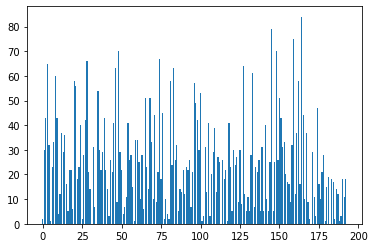

In [26]:
plt.bar(dhoni_df['match'],dhoni_df['runs_off_bat'])
plt.show()

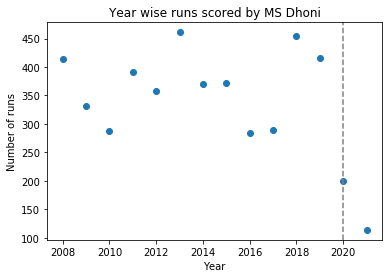

In [108]:
plt.title("Year wise runs scored by MS Dhoni")
plt.ylabel("Number of runs")
plt.xlabel("Year")
plt.scatter(dhon_2['Year'],dhon_2['runs_off_bat'])
#plt.axhline(120, ls = '--', color = 'grey')
plt.axvline(2020, ls = '--', color = 'grey')
plt.show()


In [107]:
# plt.title("Year wise strike rate by MS Dhoni")
# plt.ylabel("Strike Rate")
# plt.xlabel("Year")
# plt.bar(final_df['Year'],final_df['Strike rate'])
# plt.show()

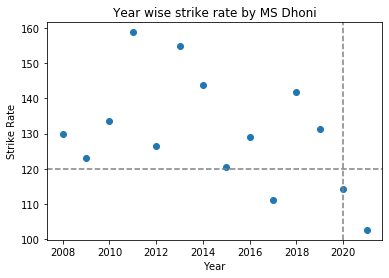

In [98]:
plt.title("Year wise strike rate by MS Dhoni")
plt.ylabel("Strike Rate")
plt.xlabel("Year")
plt.scatter(final_df['Year'],final_df['Strike rate'])
plt.axhline(120, ls = '--', color = 'grey')
plt.axvline(2020, ls = '--', color = 'grey')
plt.show()

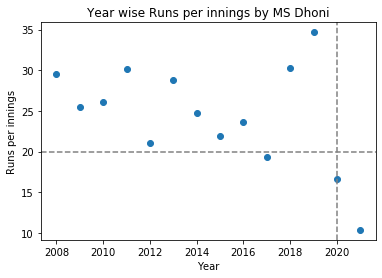

In [105]:
plt.title("Year wise Runs per innings by MS Dhoni")
plt.ylabel("Runs per innings")
plt.xlabel("Year")
plt.scatter(final_df['Year'],final_df['Runs Per Innings'])
plt.axhline(20,ls = '--', color = 'grey')
plt.axvline(2020, ls = '--', color = 'grey')
plt.show()

# Conclusions

In [112]:
## From the visualizations it is clear that MS Dhoni is struggling with bat from past 2 Years
## He scored less that 250 runs in both 2020 and 2021 season whereas before 2020 he has minimun 300 runs in every season.
## 2018 and 2019 are best for MS Dhoni in terms of runs scored in season, strike rate and runs per innings
## Strike rate dropped to below 120 in 2020 and below 100 in 2020
## His runs per innings also dropped from past 2 years
## Finally MS Dhoni is not fit to bat but Dhoni is known for his comebacks hoping 2022 is a good year for him.